In [1]:
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('data_stats.json', 'r') as fp:
  d = json.load(fp)

## Average ratio of rows to cols

In [3]:
ratios = []
  
for user in d.keys():
  for base in d[user].keys():
    nrows = d[user][base]['nrows']
    ncols = d[user][base]['ncols']
    ratio = nrows / ncols
    ratios.append(ratio)
    
    # Is the ratio ever below 1? I.e., do we ever have more cols than rows?
    if ratio < 1:
      print('user:', user)
      print('base:', base)
      print('nrows:', nrows)
      print('ncols:', ncols)
      print('ratio:', ratio)
      print('---')
  ### END FOR ###
### END FOR ###

avg_ratio = sum(ratios) / len(ratios)

print(avg_ratio)


user: vinothsuku
base: test
nrows: 5
ncols: 7
ratio: 0.7142857142857143
---
user: seriousran
base: Measurement_item_info
nrows: 6
ncols: 7
ratio: 0.8571428571428571
---
271458.9190213947


## Histogram of Column Types

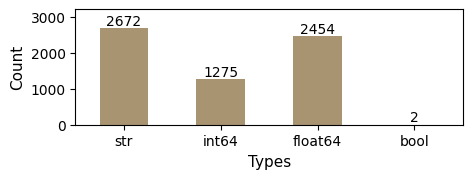

In [ ]:
tys = defaultdict(int)

for user in d.keys():
  for base in d[user].keys():
    types = d[user][base]['types']
    for ty in types:
      tys[ty] += 1
    ### END FOR ###
  ### END FOR ###
### END FOR ###

tys_count = pd.Series(tys)



ax = tys_count.plot(kind="bar", legend=False, figsize=(5, 1.5), color="#A08963", alpha=0.9)
plt.ylabel("Count", fontsize=11)
plt.xlabel("Types", fontsize=11)
plt.xticks(rotation=0)
ax.set_ylim(0, tys_count.max() * 1.2)  # 20% padding above the highest bar
# plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='lightgrey')
# plt.tick_params(axis='y', which='major', labelsize=12)

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
          f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)


plt.savefig(f'types_count.png', format='png', dpi=200, bbox_inches='tight')